In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('stud.csv')


In [47]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
df.shape

(1000, 8)

In [52]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values in data set 

In [55]:
df.duplicated().sum()

0

### There are no duplicate values in the data set

In [61]:
# check Null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [63]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [65]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [67]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
print("Categories in 'gender' variable:", end="")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:", end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:", end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:", end="")
print(df['test_preparation_course'].unique())
     

Categories in 'gender' variable:['female' 'male']
Categories in 'race_ethnicity' variable:['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:['standard' 'free/reduced']
Categories in 'test preparation course' variable:['none' 'completed']


In [71]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features:{}'.format(len(numeric_features), numeric_features))

print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features)) 

      

We have 3 numerical features:['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [73]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [75]:
df['total score']= df['math_score']+ df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [79]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')



Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [85]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <=20]['average'].count()
math_less_20 = df[df['math_score'] <=20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insights 
1. From above values we get students have performed the worst in maths 
2. Best performance is in reading section

<Figure size 640x480 with 0 Axes>

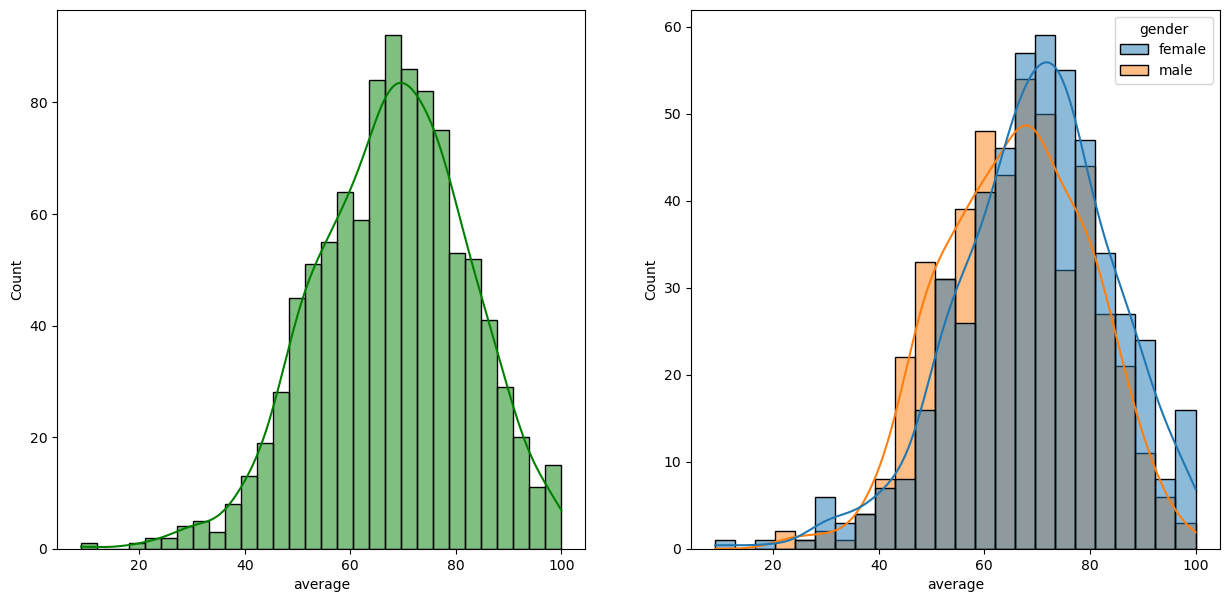

In [95]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average',bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

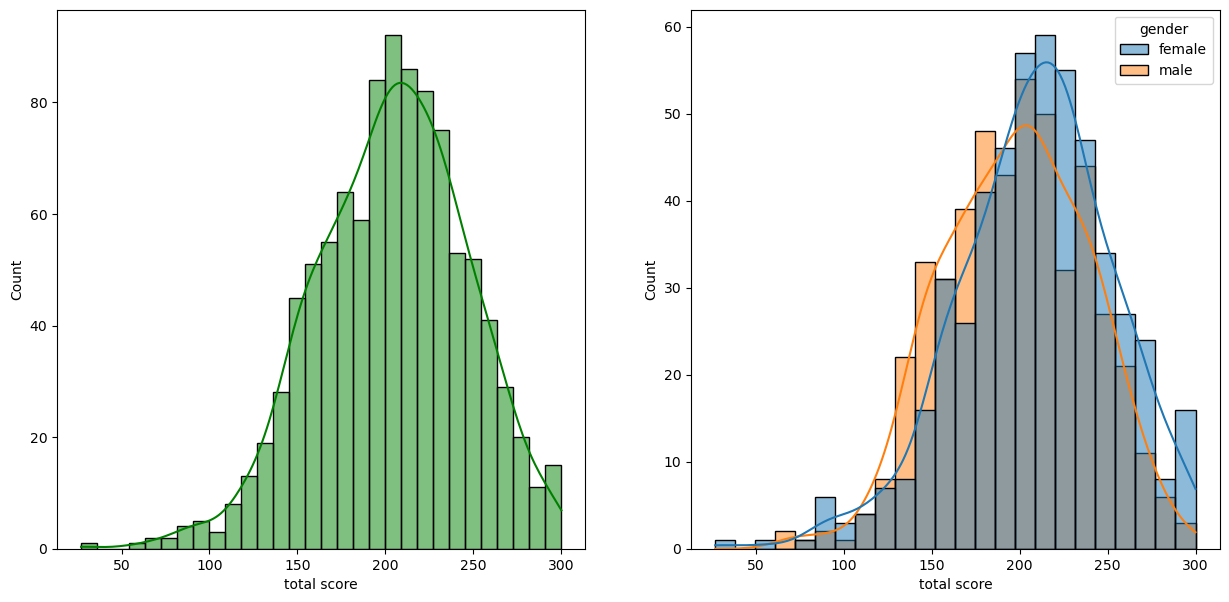

In [98]:
 fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

 Female students tend to perform well then male students 

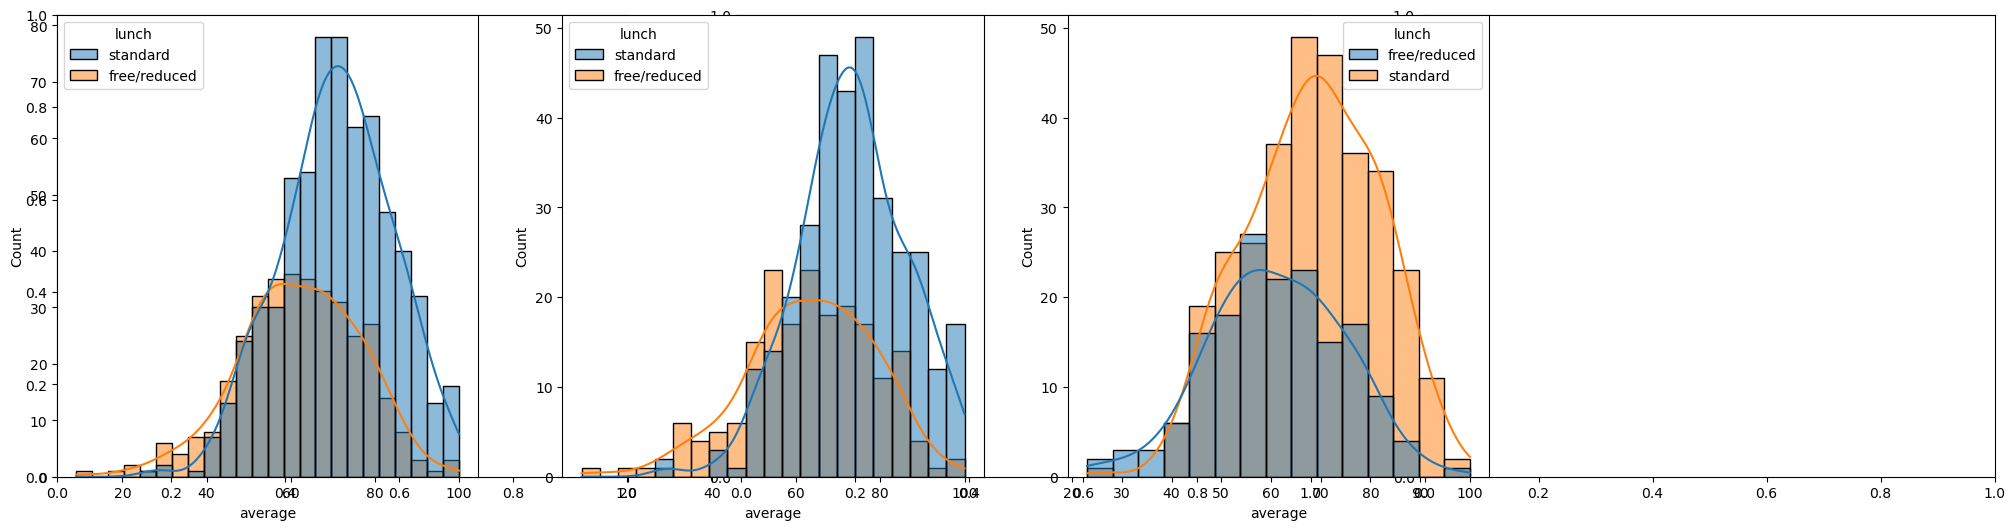

In [101]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


1.Standard lunch helps performs well in lunch
2.Standard lunch helps performs  well in exams be it a male or a female.

In [113]:
plt.figure(figsize=(25,6))
plt.subplot(131)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')

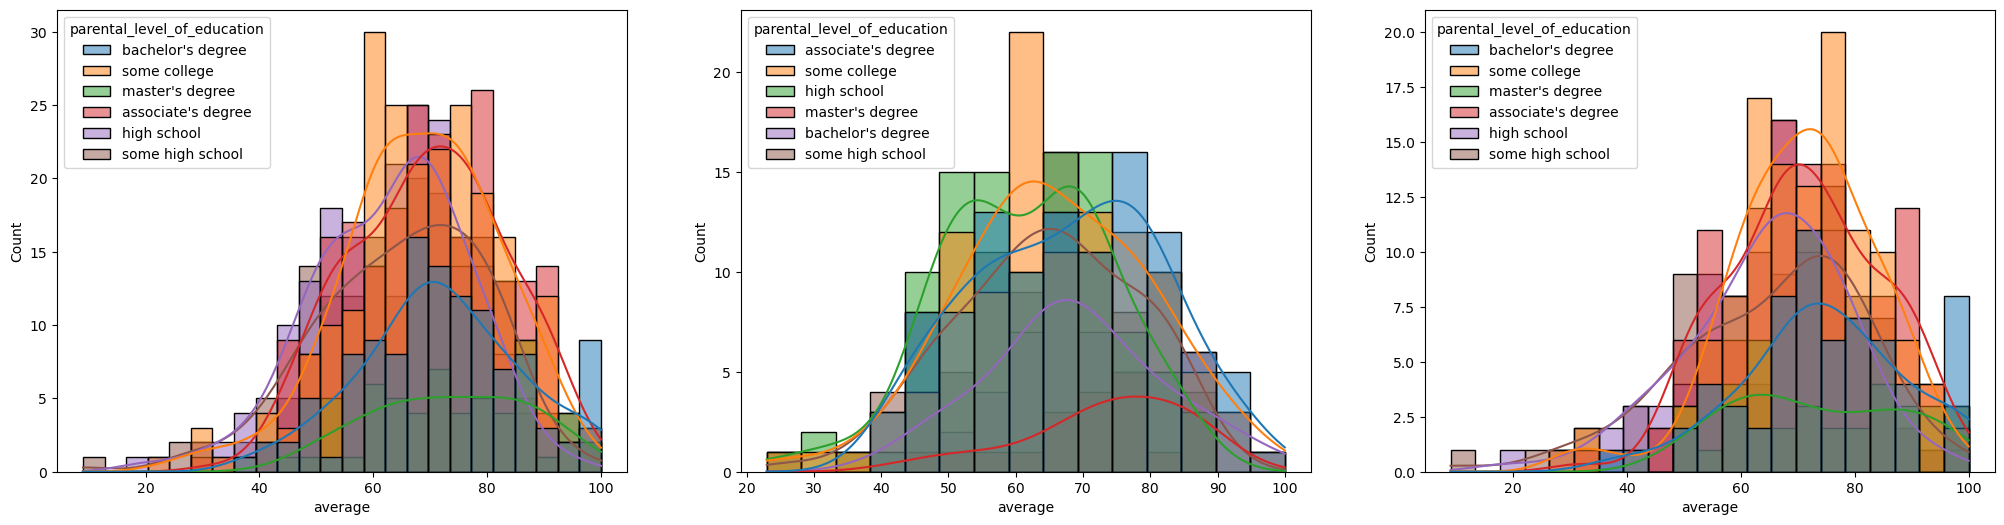

In [115]:
plt.show()

Insights
1) In general parent's education don't help student perform well in exam.
2) 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3) 3rd plot we can see there is no effect of parent's education on female students.

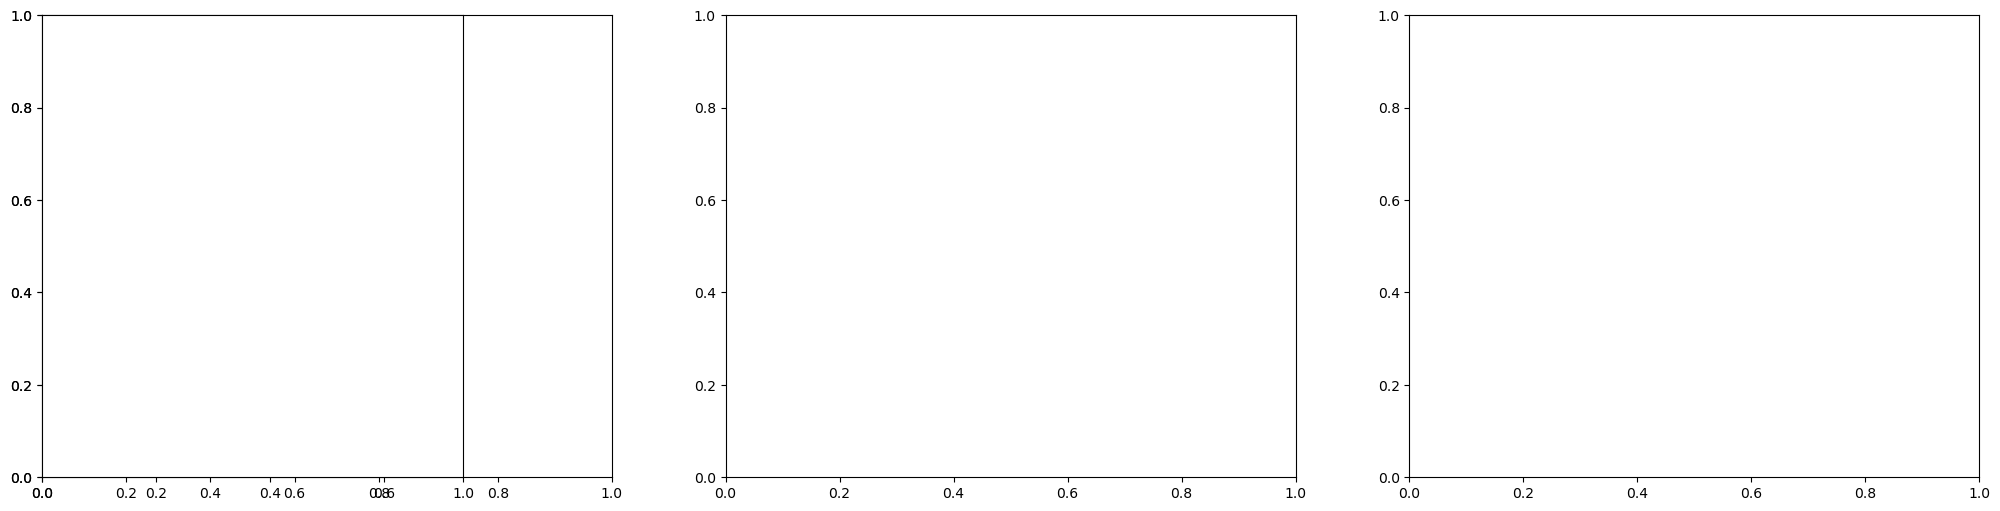

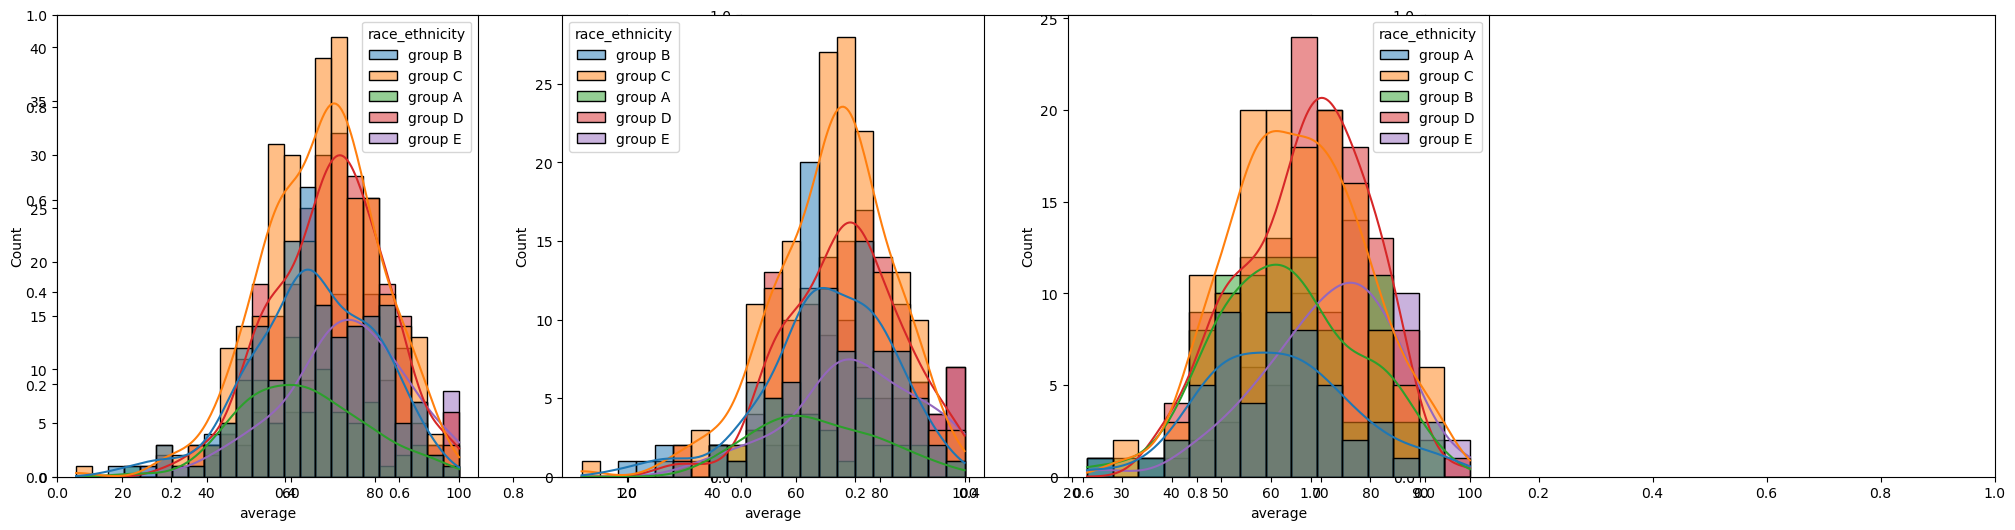

In [127]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

 Insights
1. Students of group A and group B tends to perform poorly in exam.
2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

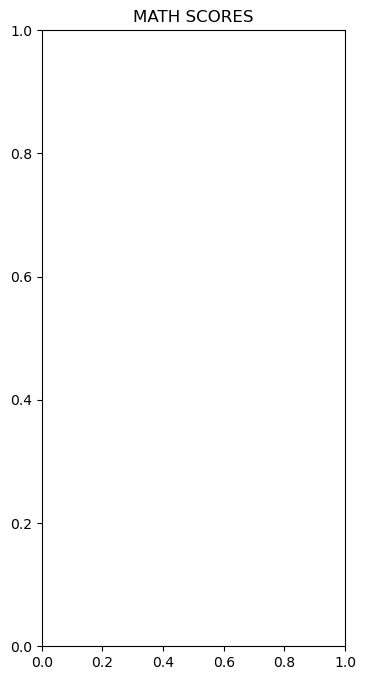

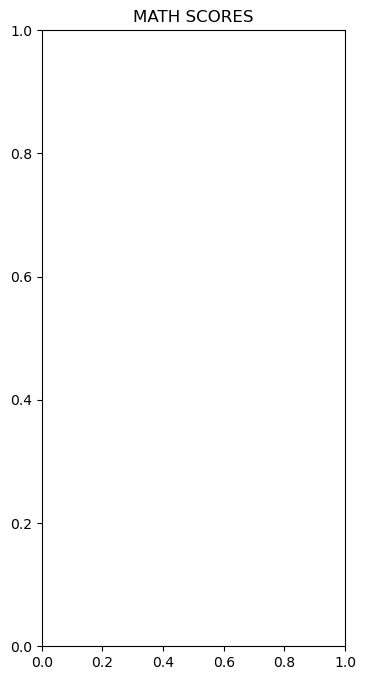

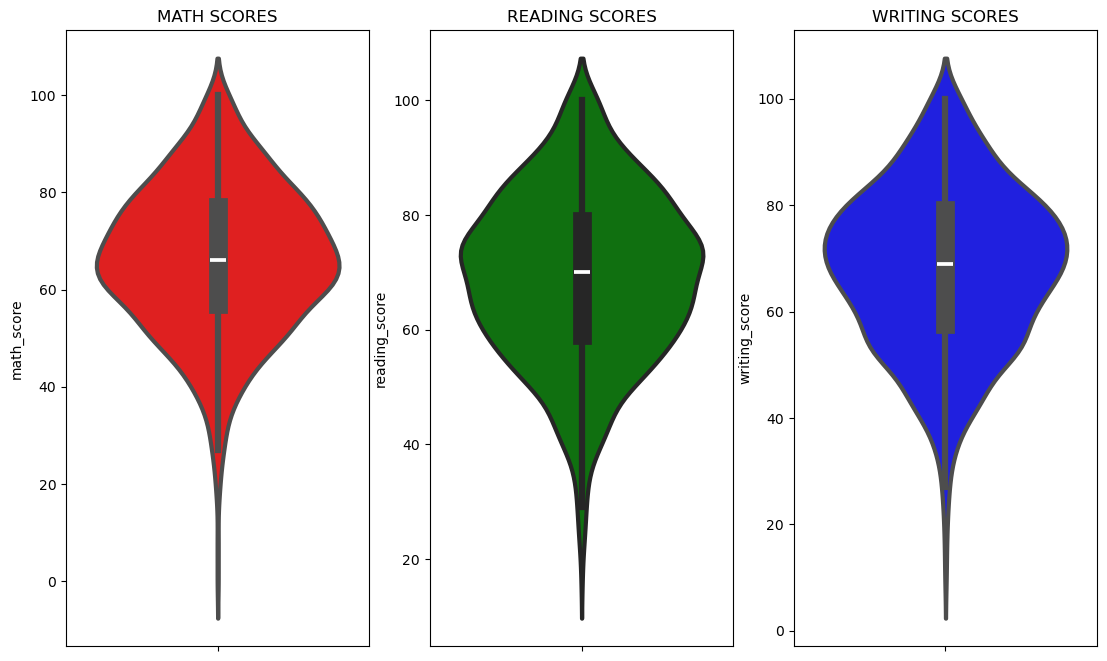

In [136]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score' , data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()


### Insights 
from the above three plots its clearly visible that most of the students score in between 60-80 in Maths
whereas in reading and writing most of them score from 50-80

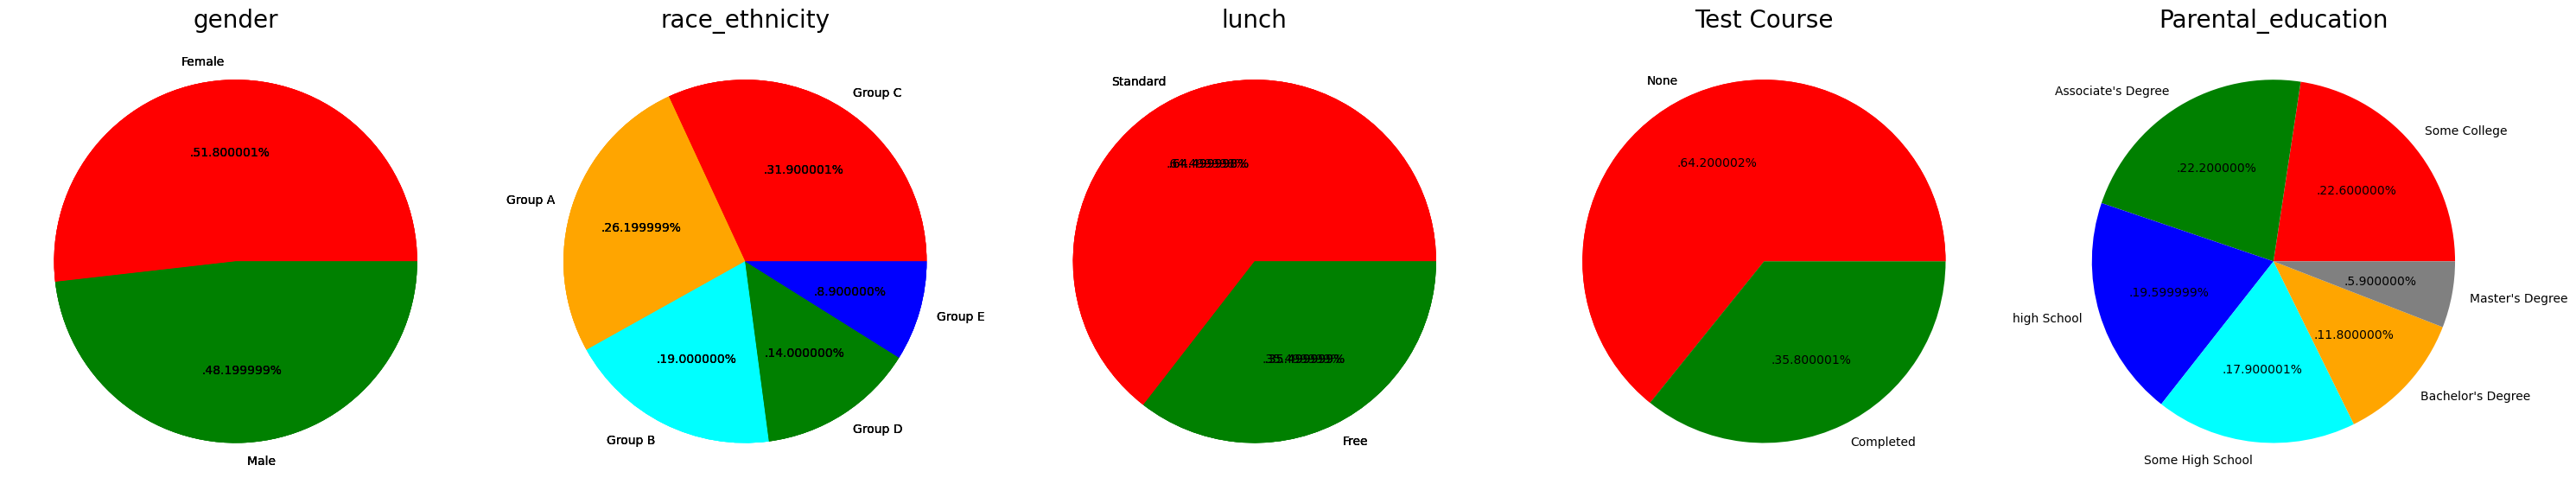

In [151]:
  plt.rcParams['figure.figsize']= (30,12)

plt.subplot(1,5,1)
size= df['gender'].value_counts()
labels = ['Female', 'Male ']
color= ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size= df['race_ethnicity'].value_counts()
labels= ['Group C', 'Group A' , 'Group B', 'Group D', 'Group E']
color= ['red', 'orange', 'cyan', 'green', 'blue']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('race_ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size= df['lunch'].value_counts()
labels= ['Standard', 'Free']
color= ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test_preparation_course'].value_counts()
labels= ['None', 'Completed']
color=['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental_level_of_education'].value_counts()
labels = ['Some College', "Associate's Degree", "high School", "Some High School", "Bachelor's Degree", "Master's Degree"]
color= ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental_education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

### Insights 
1. Number of Male and Female students is almost equal 
2. Number of students are greatest in Group C 
3. Number of students who have standard lunch are greater 
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Feature Wise Visualization
GENDER COLUMN 
1. How is distribution of Gender?
2. Is gender has any impact on student's performance?

### UNIVARIATE ANALYSIS( How is distribution of Gender?)

<Figure size 3000x1200 with 0 Axes>

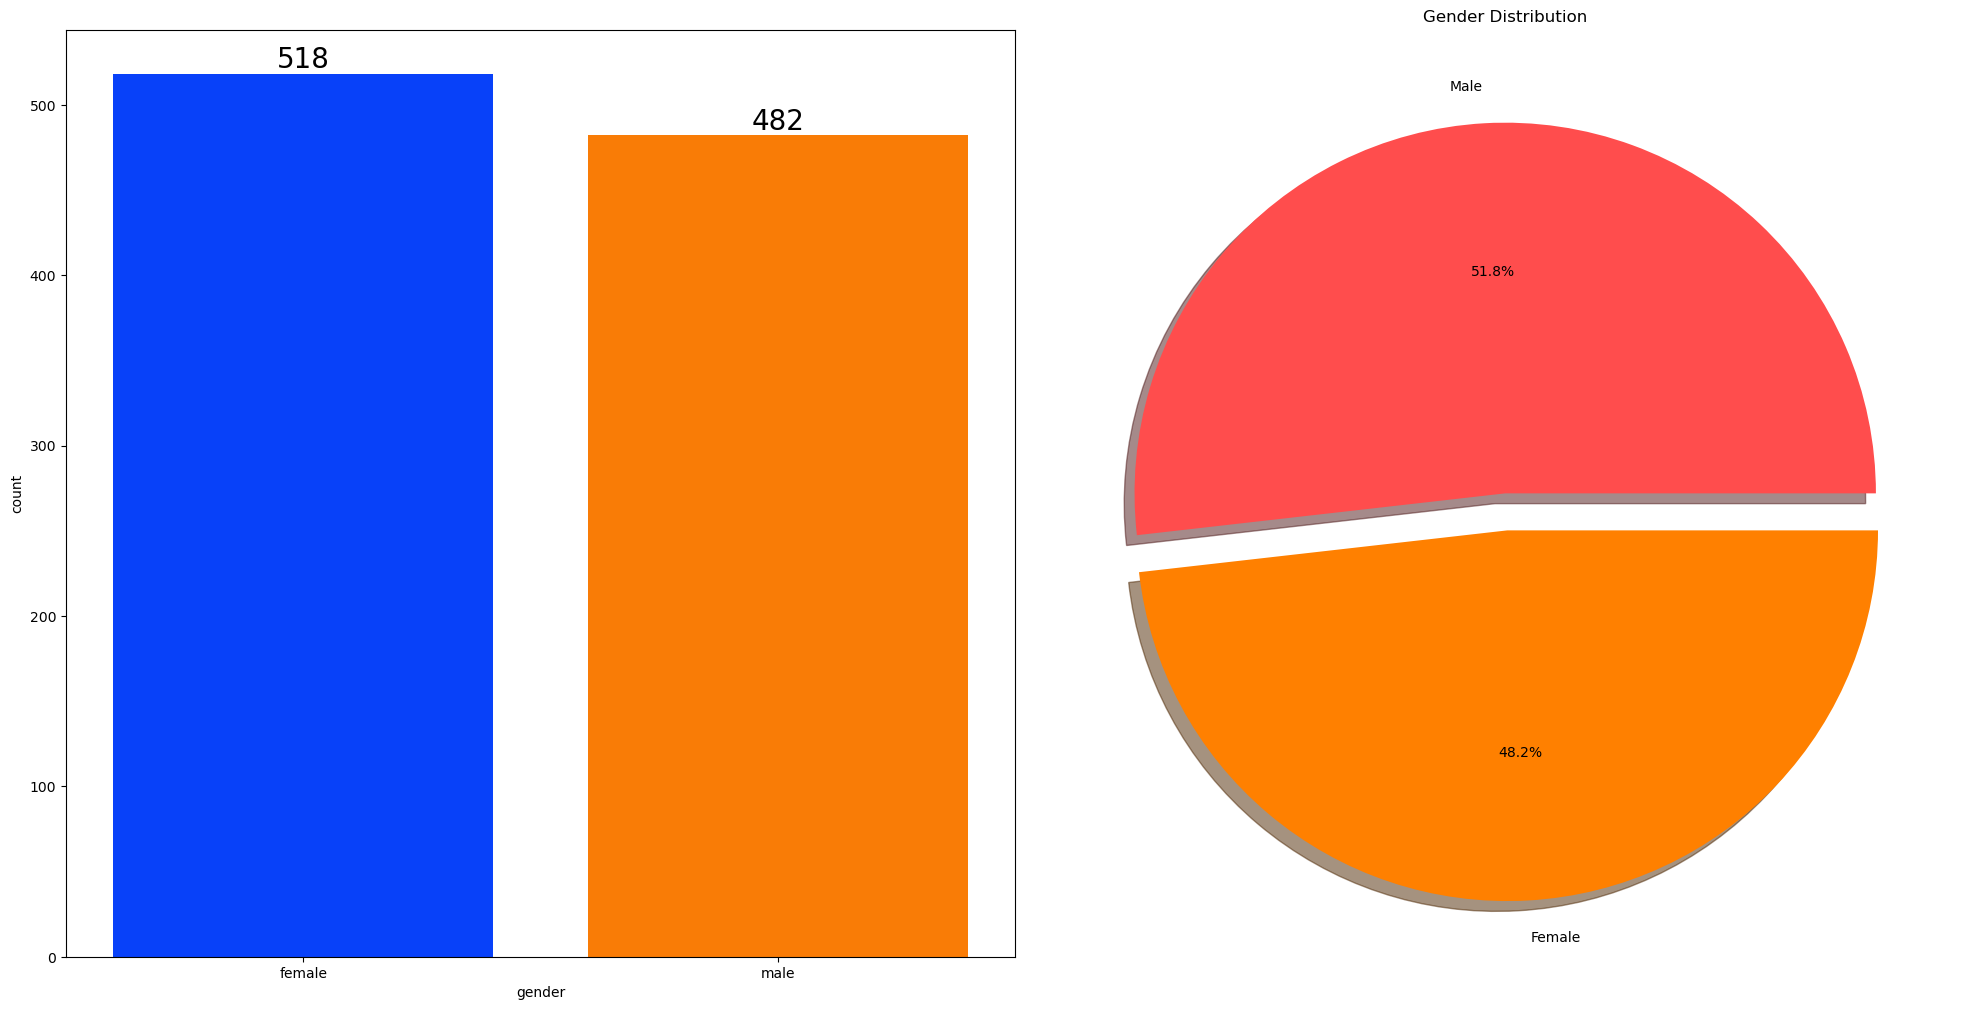

In [167]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
 
ax[1].pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], 
          explode=[0, 0.1], autopct='%1.1f%%', shadow=True, 
          colors=['#ff4d4d', '#ff8000'])
ax[1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()

### Insights 
Gender has balanced data with female students are 518(48%) and male students are 482(52%)

BIVARIATE ANALYSIS (Is gender has any impact on student's performance?)


In [184]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


<Figure size 1000x800 with 0 Axes>

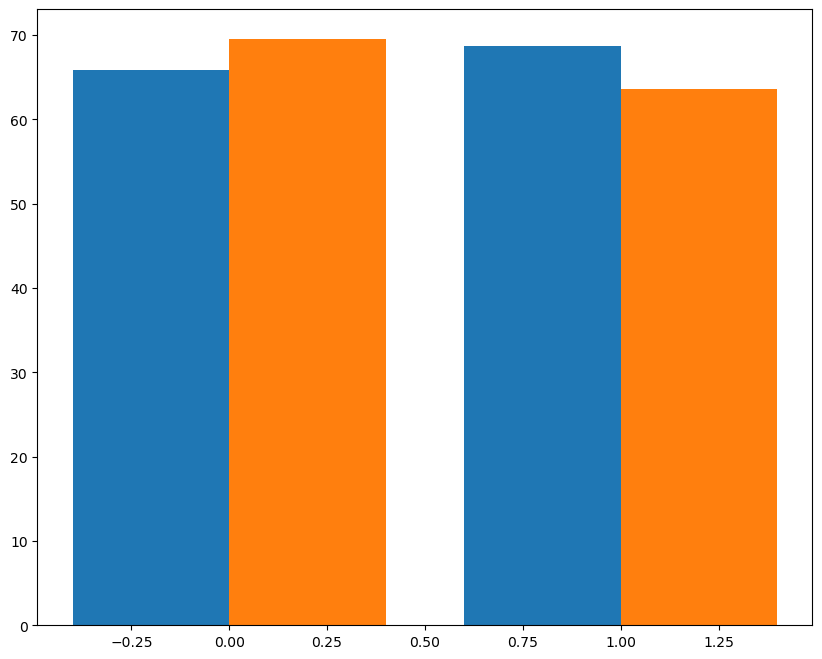

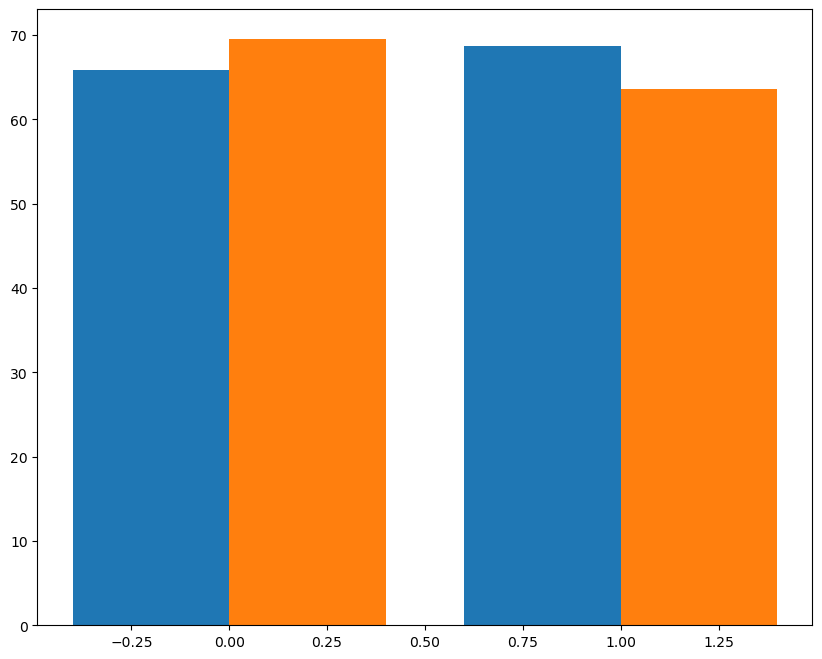

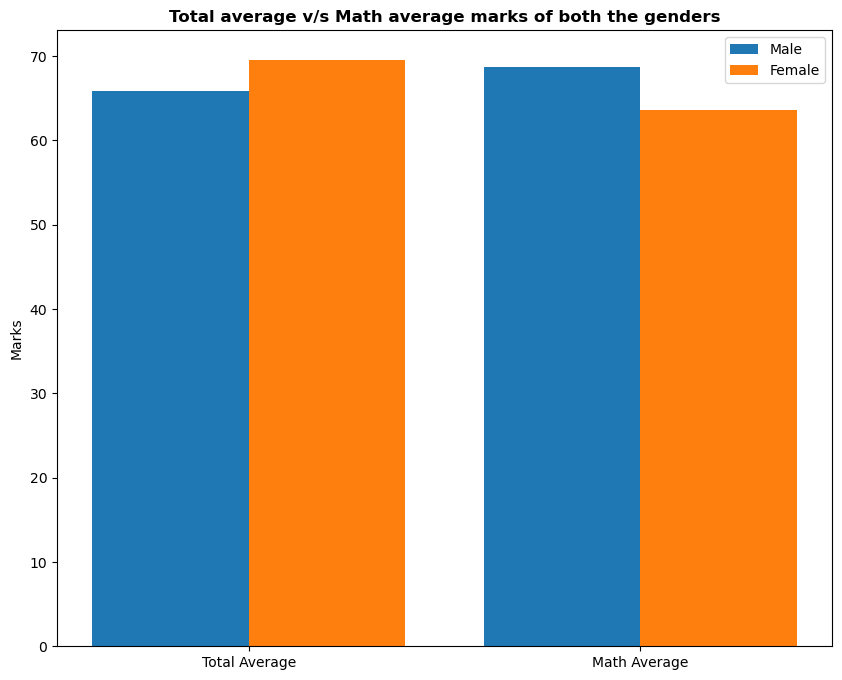

In [192]:
plt.figure(figsize =(10,8))

X=['Total Average', 'Math Average']

female_scores =[gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders" , fontweight='bold')
plt.legend()
plt.show()

Insights 
1. On an average females have a better overall score than men.
2. whereas males have scored higher 

### RACE/ETHNICITY COLUMN
1. How is group wise distribution?
2. Is Race/Ethnicity has any impact on student's performance?

### UNIVARIATE ANALYSIS(How is group wise distribution?)

In [199]:
f, ax=plt.subplot(1,2, figsize=(20,10))
sns.countplot(x=df['race/ethnicity'], data=df, palette = 'bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

### Insights
1. Most of the student belonging from groupC / Group D
2. Lowest number of students belong to group A

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ?)

<Figure size 3000x1200 with 0 Axes>

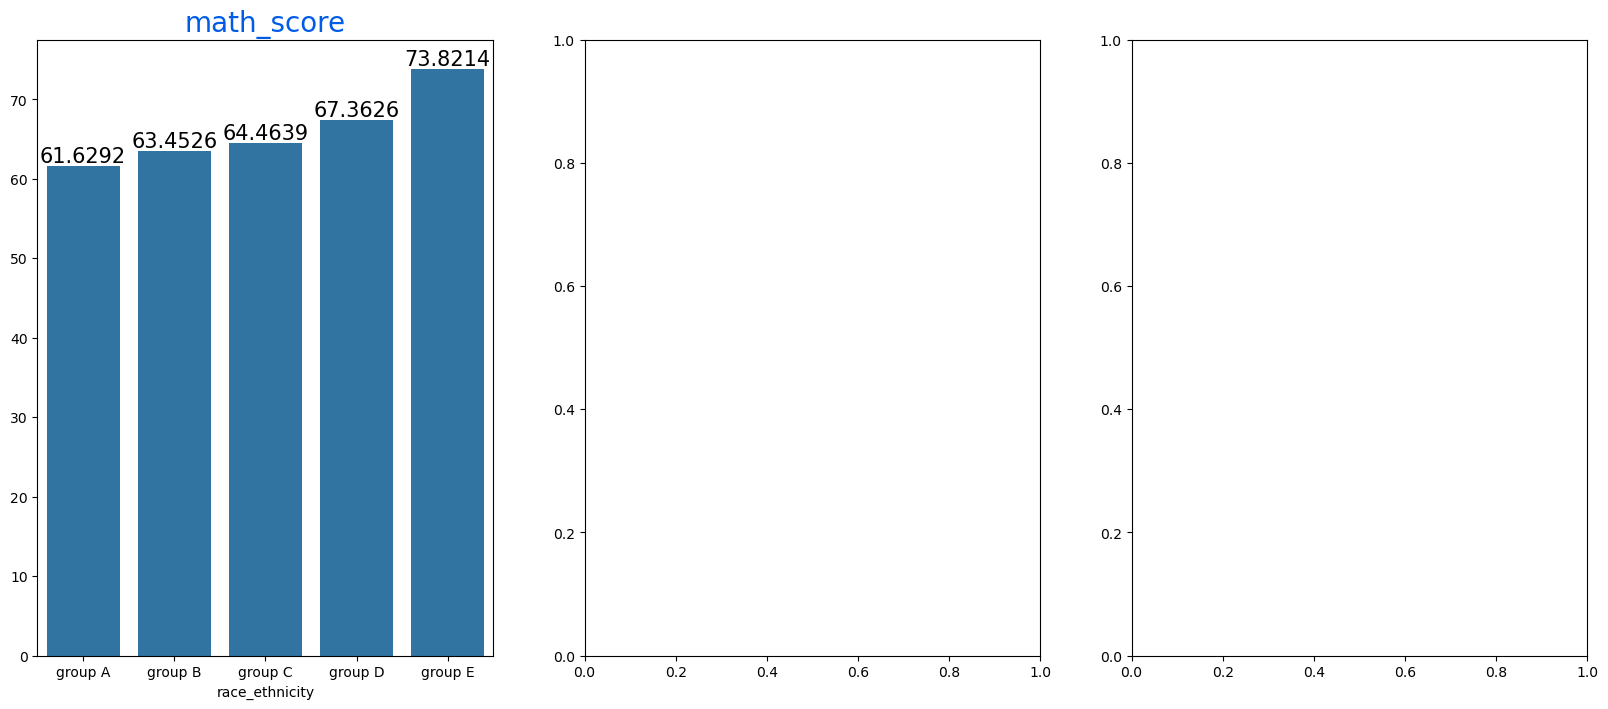

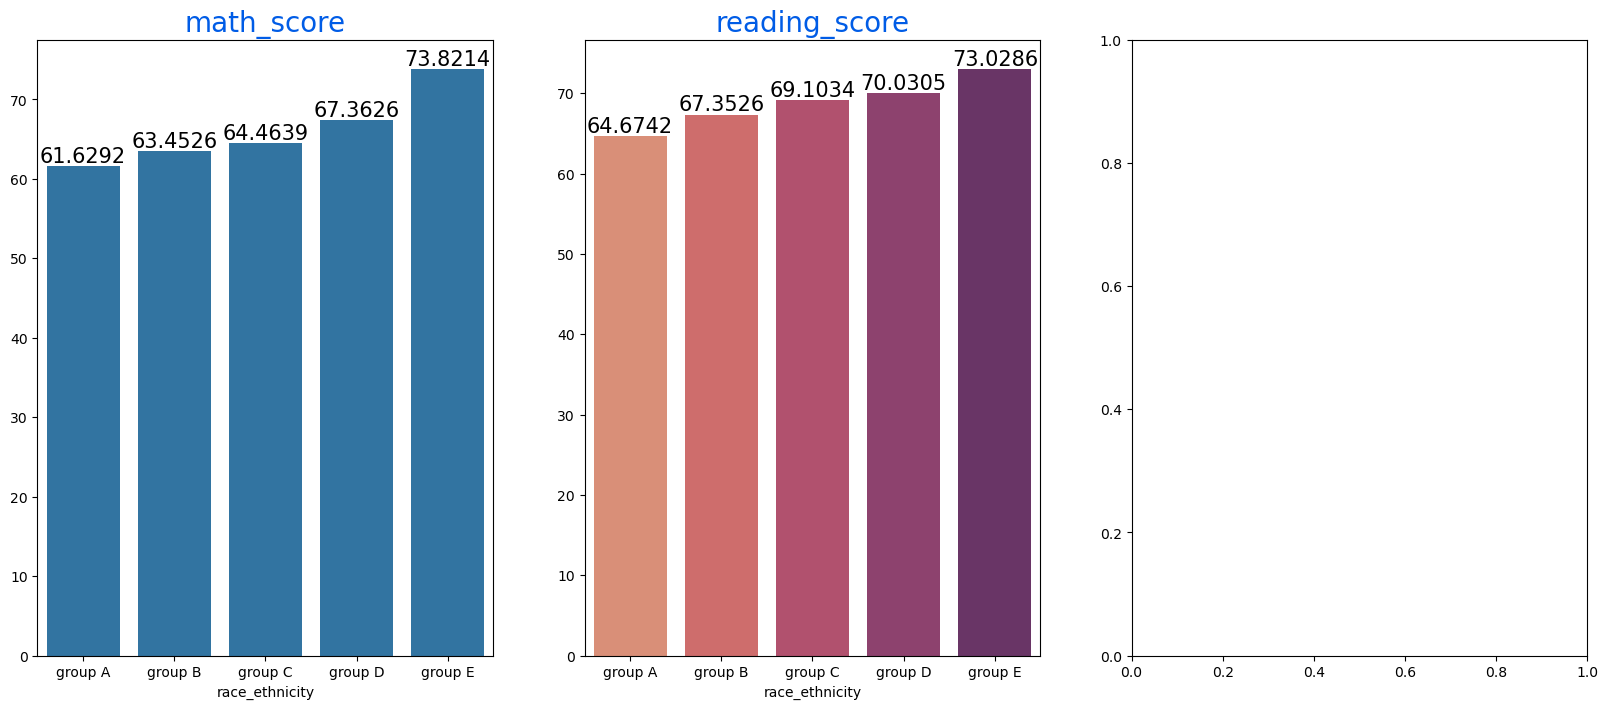

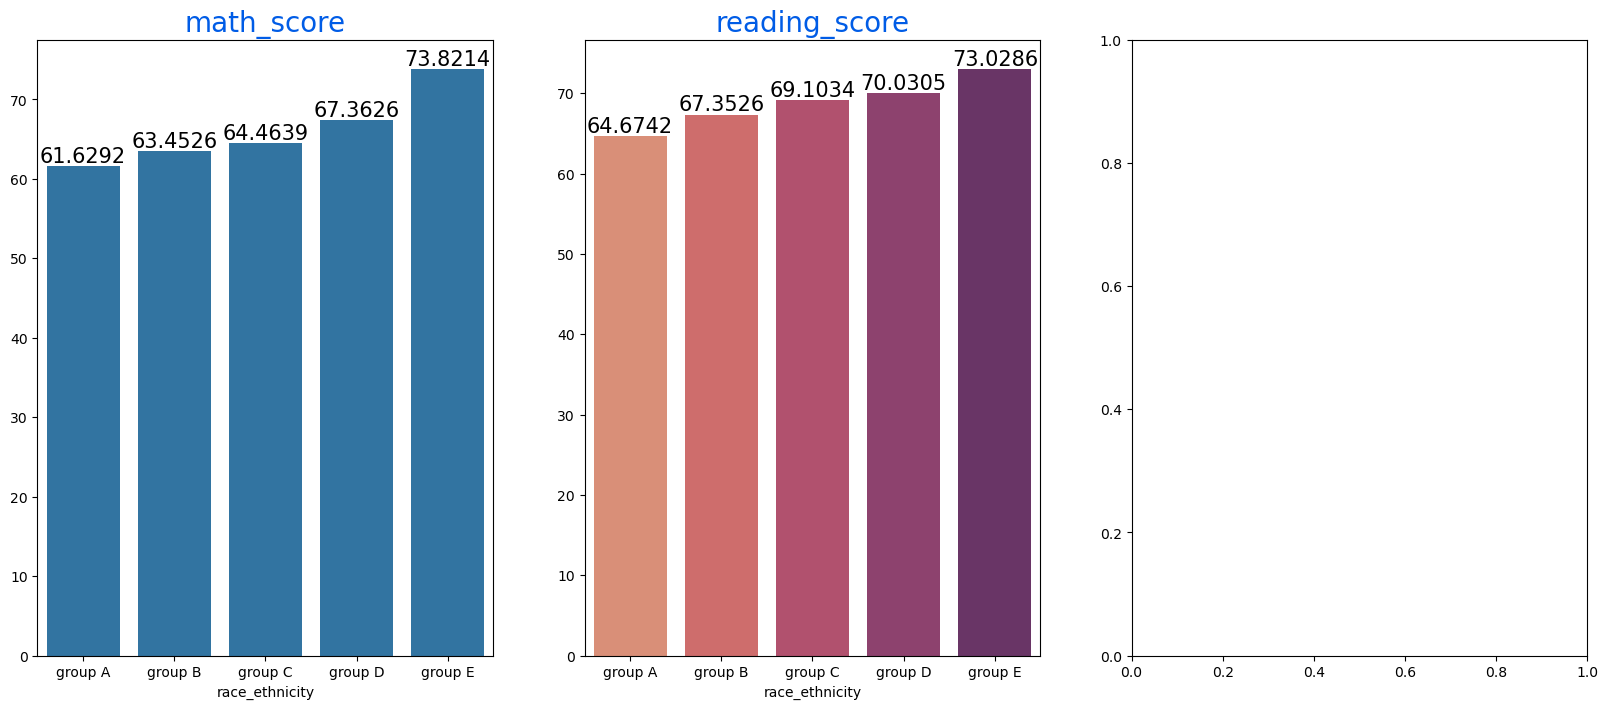

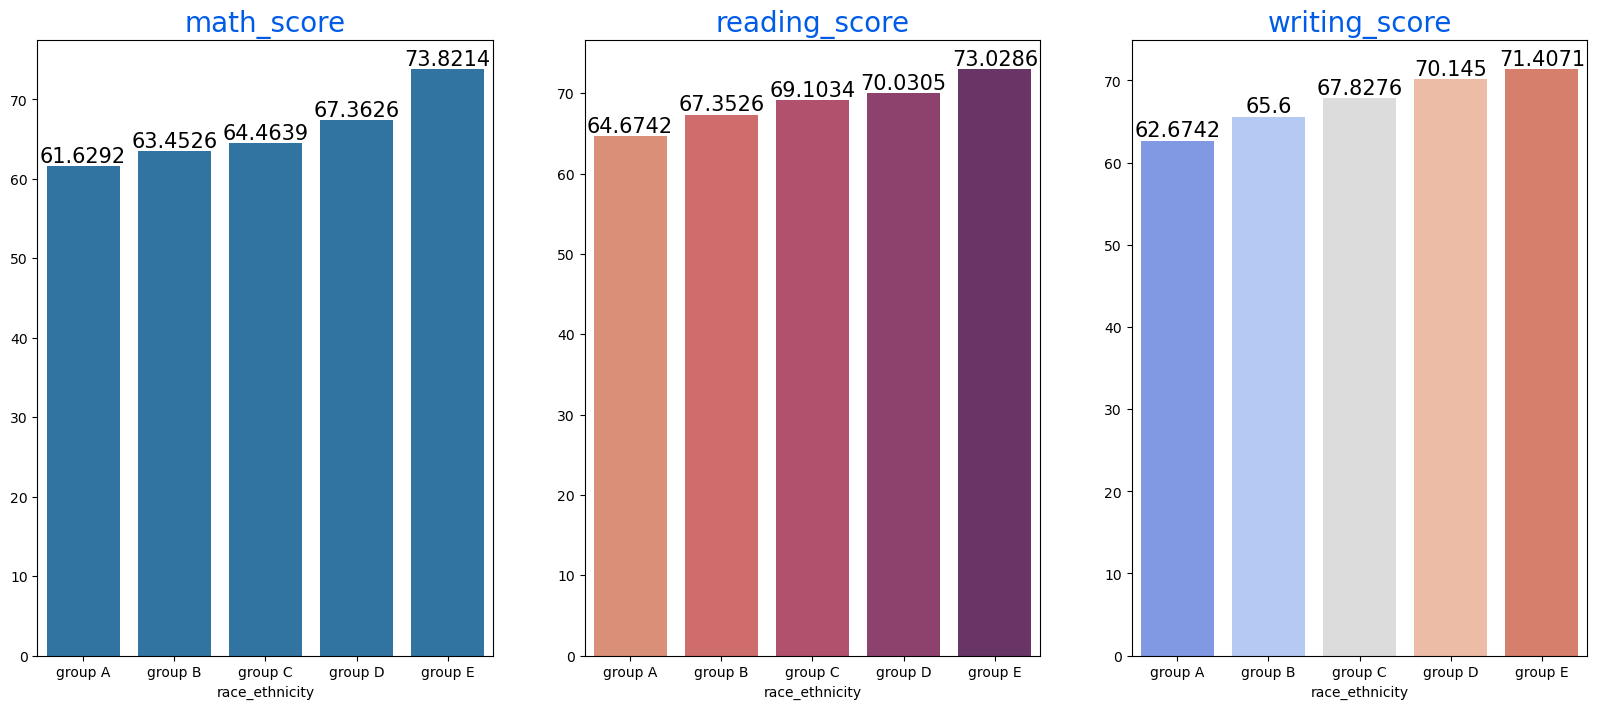

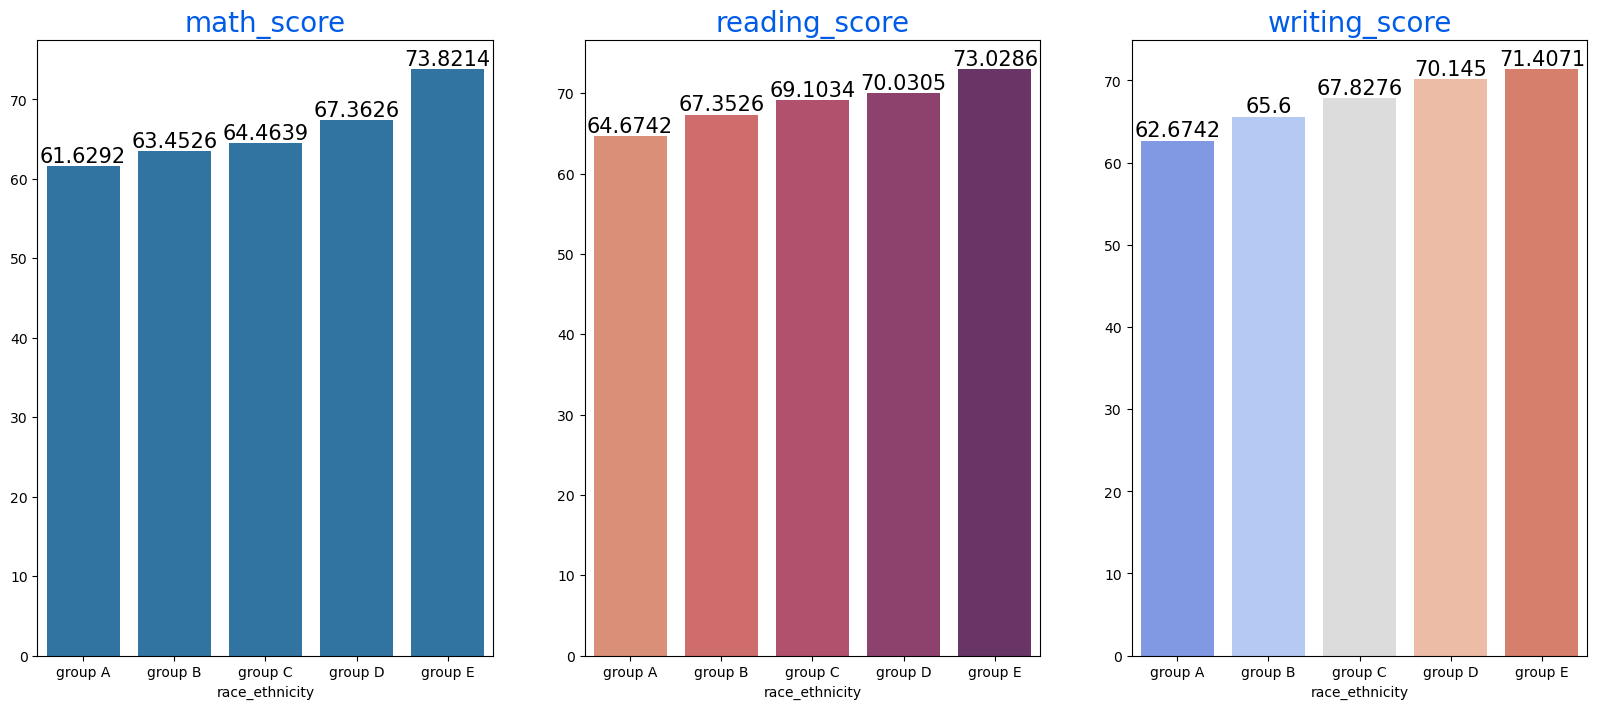

In [217]:
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, ax=ax[0])
ax[0].set_title('math_score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('reading_score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('writing_score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15) 

plt.show()


### Insights 
1. Group E students have scored the highest marks. 
2. Group A students have scored the lowest marks.
3. Students from a lower socioeconomic status have a lower avg in all course subjects

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

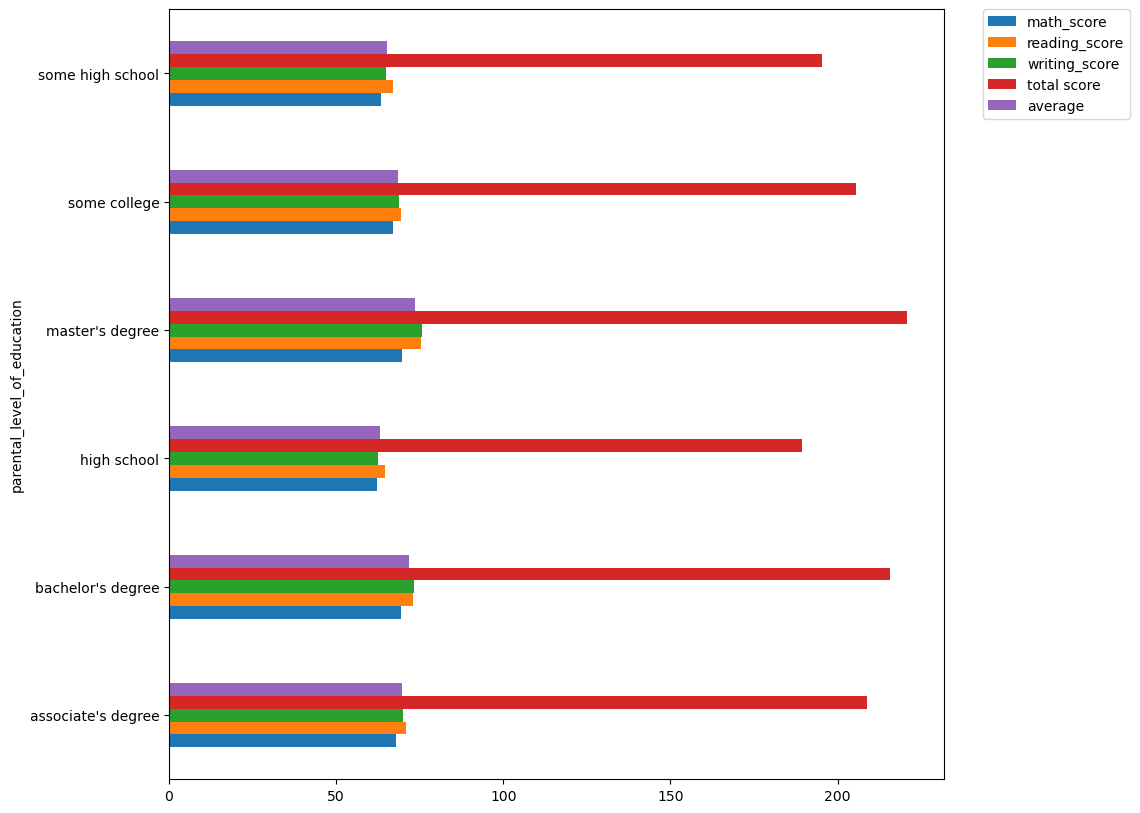

In [235]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### Univariate Analysis(Which type of lunch is most common among students?)

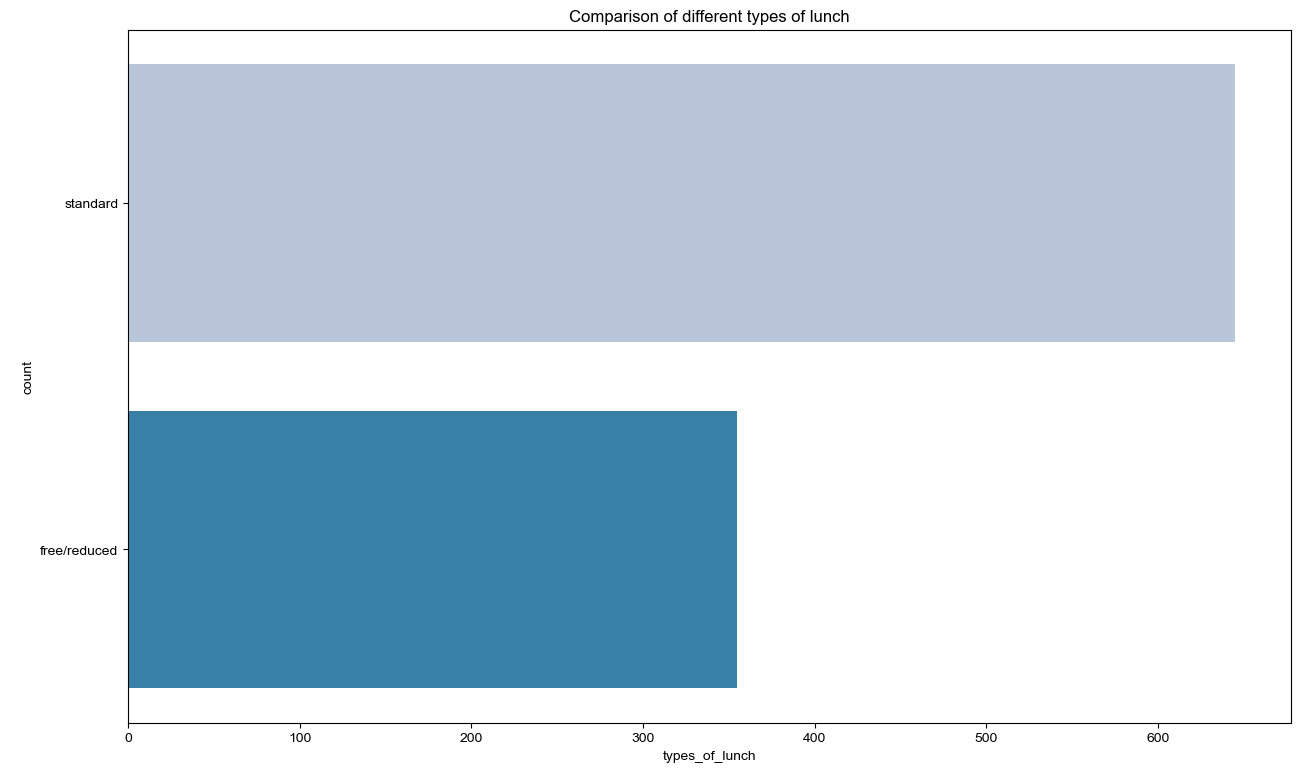

In [259]:
plt.rcParams['figure.figsize']= (15,9)
plt.style.use('seaborn-v0_8-darkgrid')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch')
plt.xlabel('types_of_lunch')
plt.ylabel('count')
plt.show()


In [261]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Insights
- Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

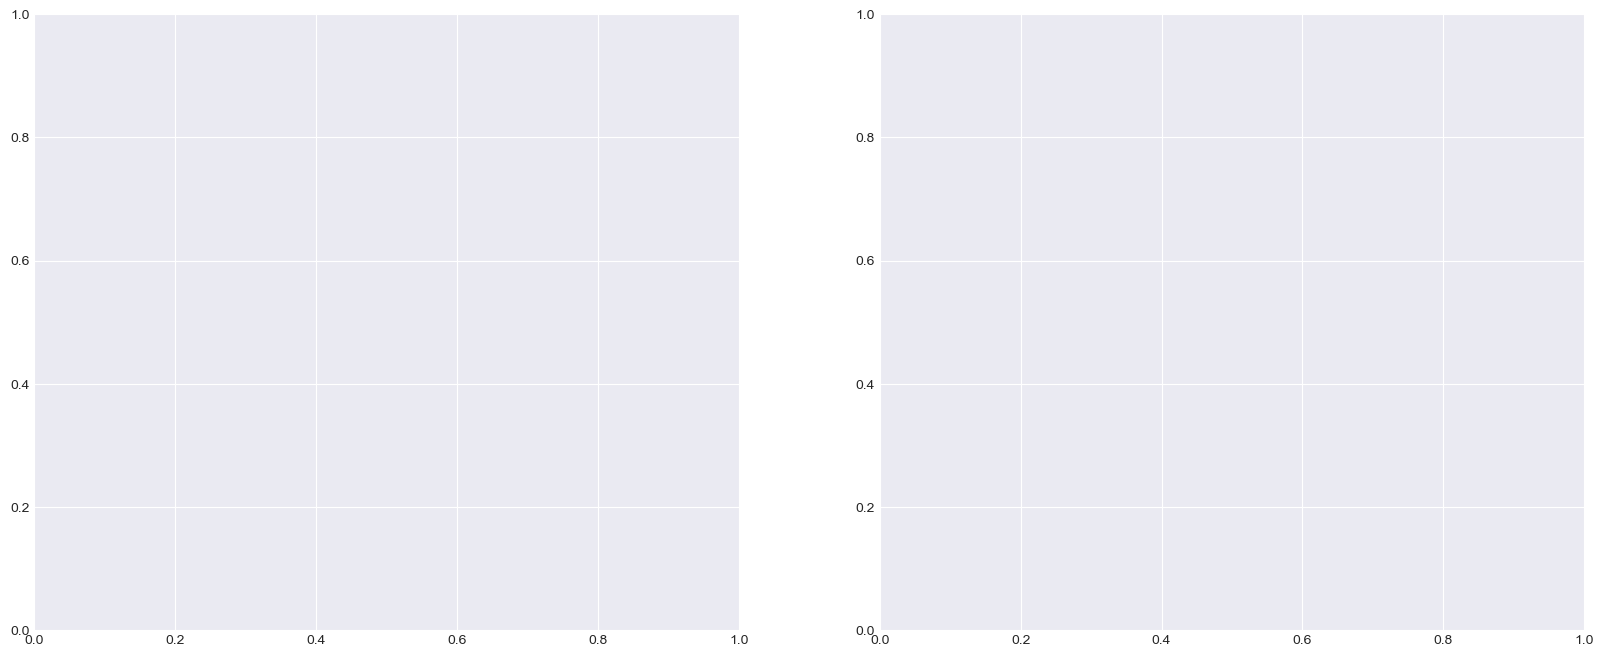

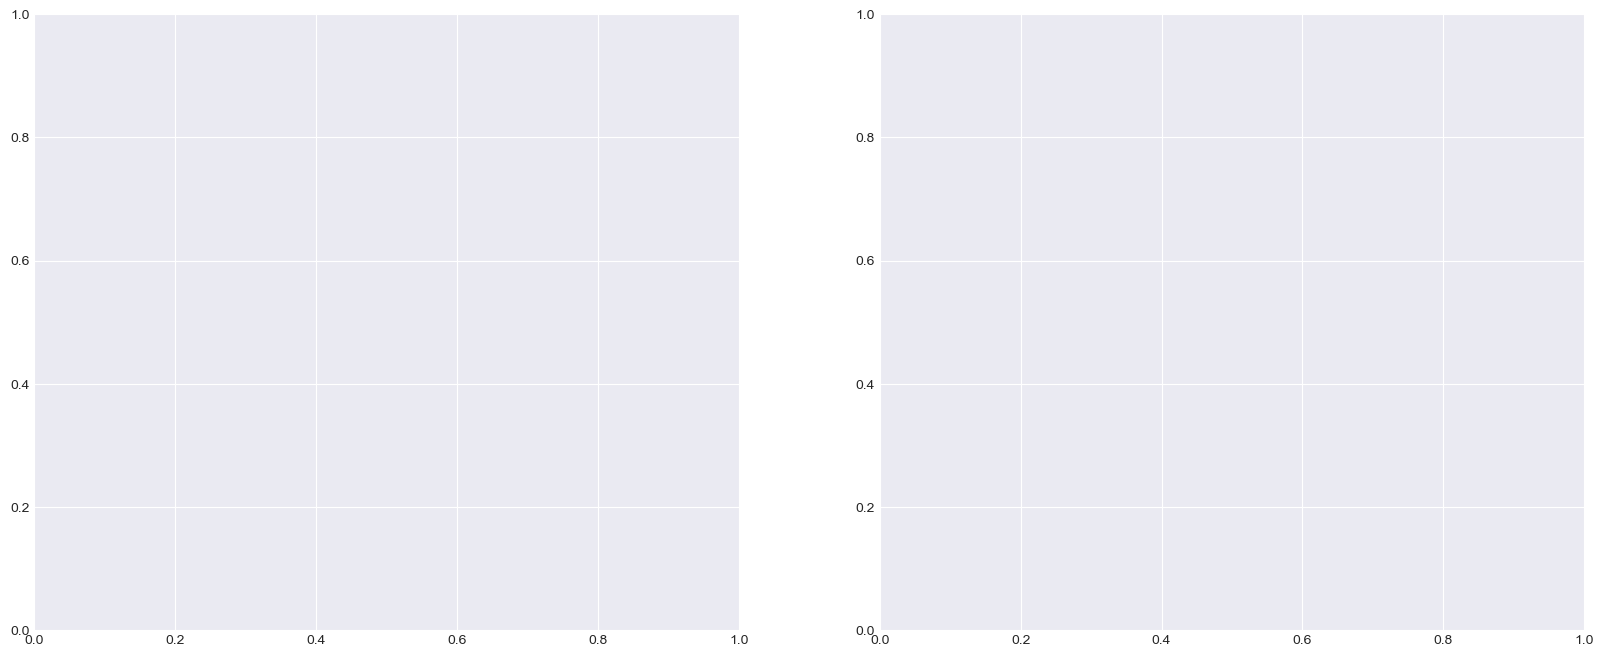

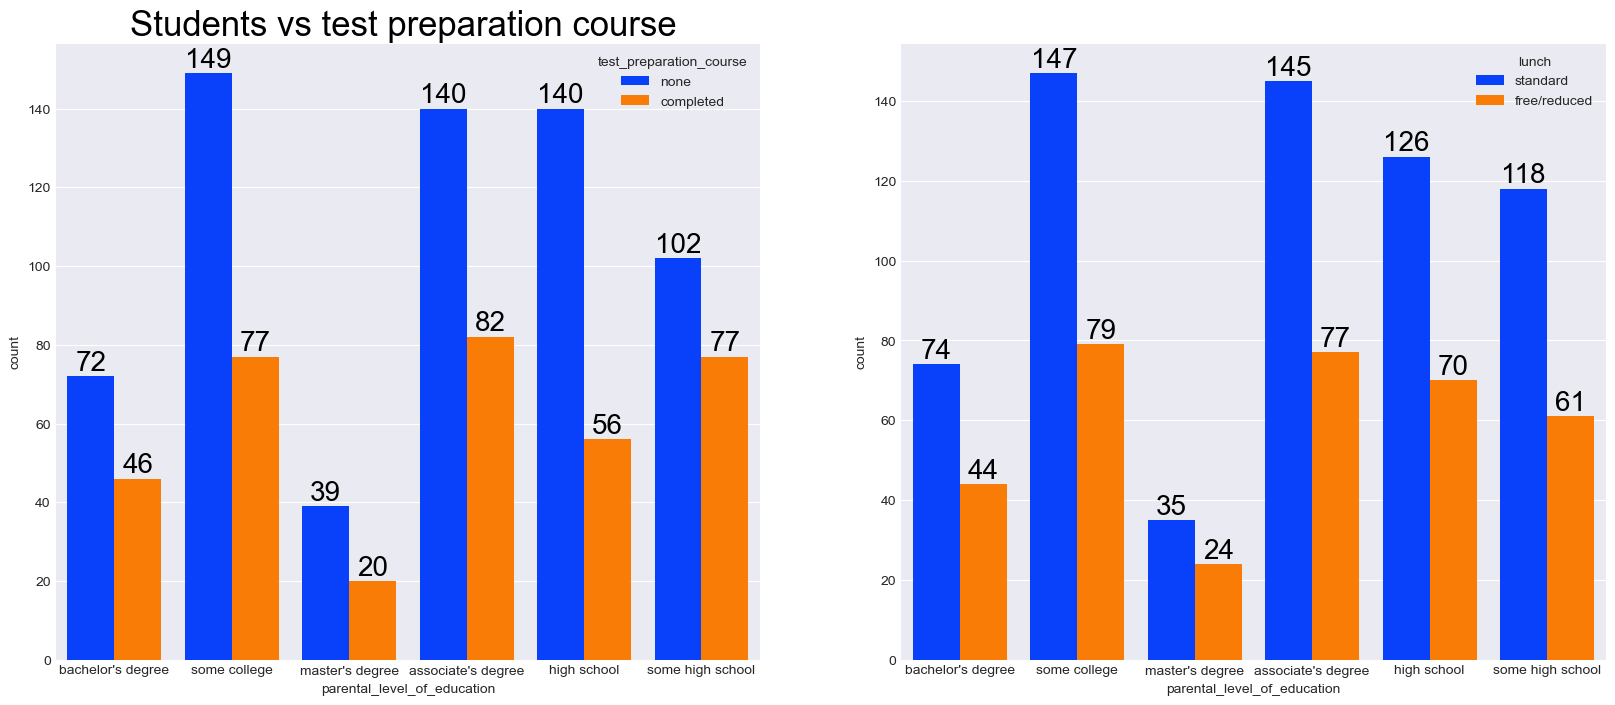

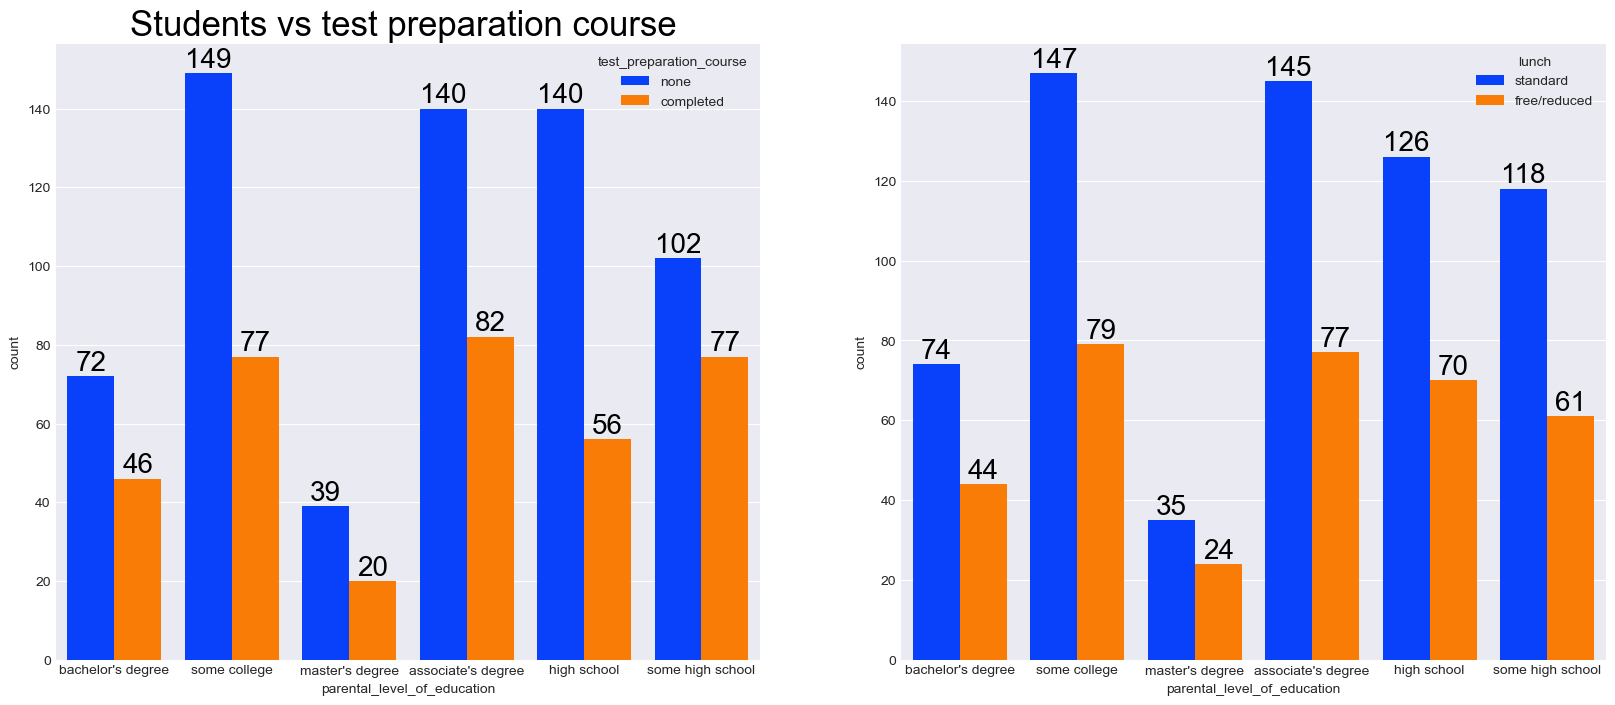

In [271]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
plt.show()

Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

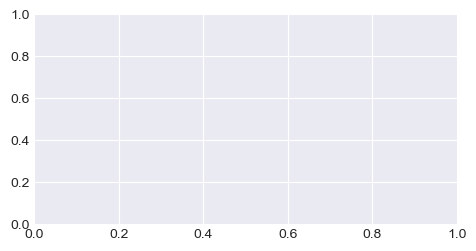

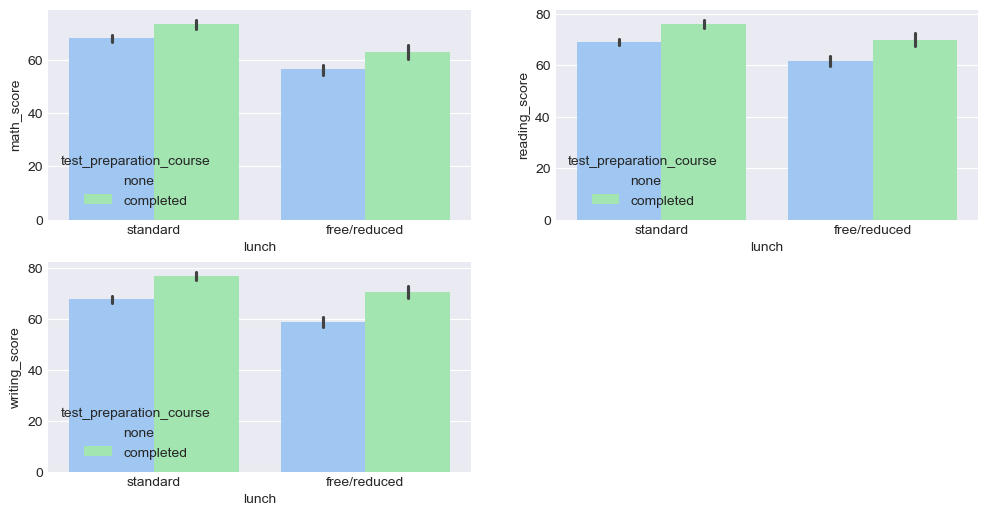

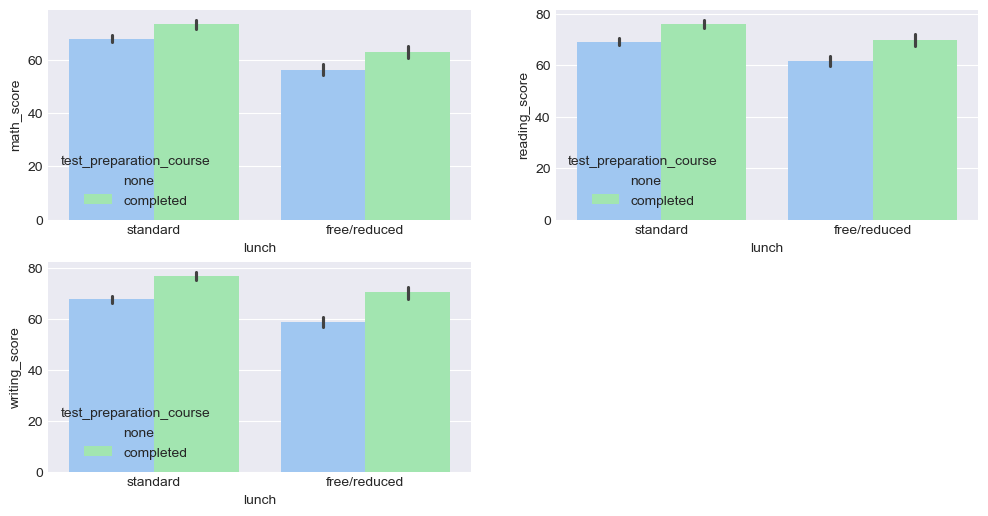

In [280]:
 plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.show()

Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the cours

### CHECKING OUTLIERS

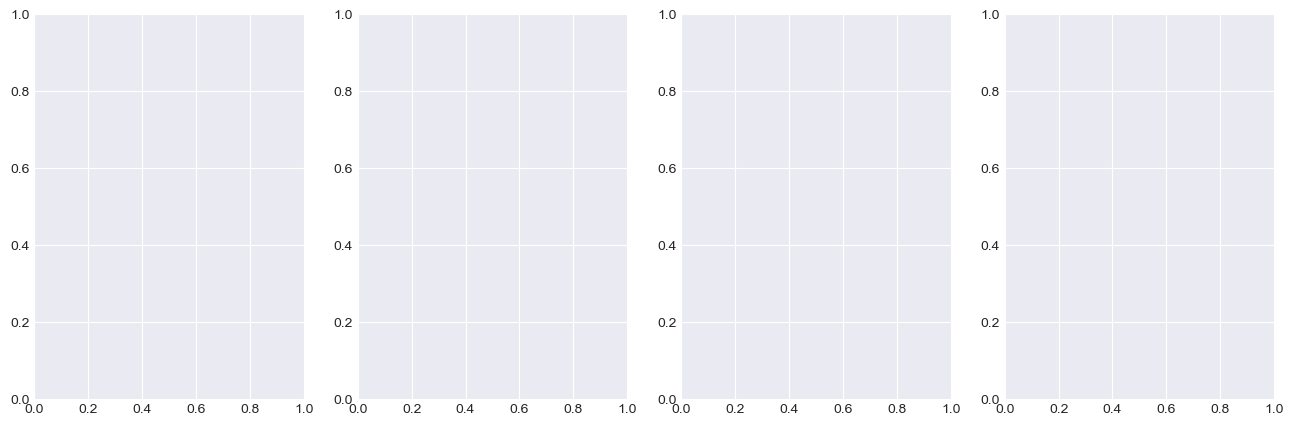

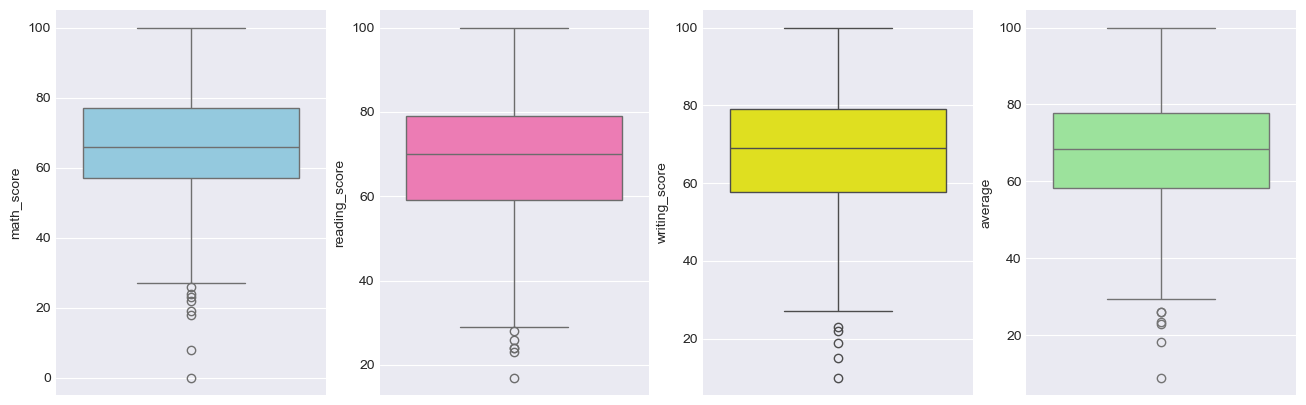

In [287]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### MULTIVARIATE ANALTSIS USING PAIRPLOT 

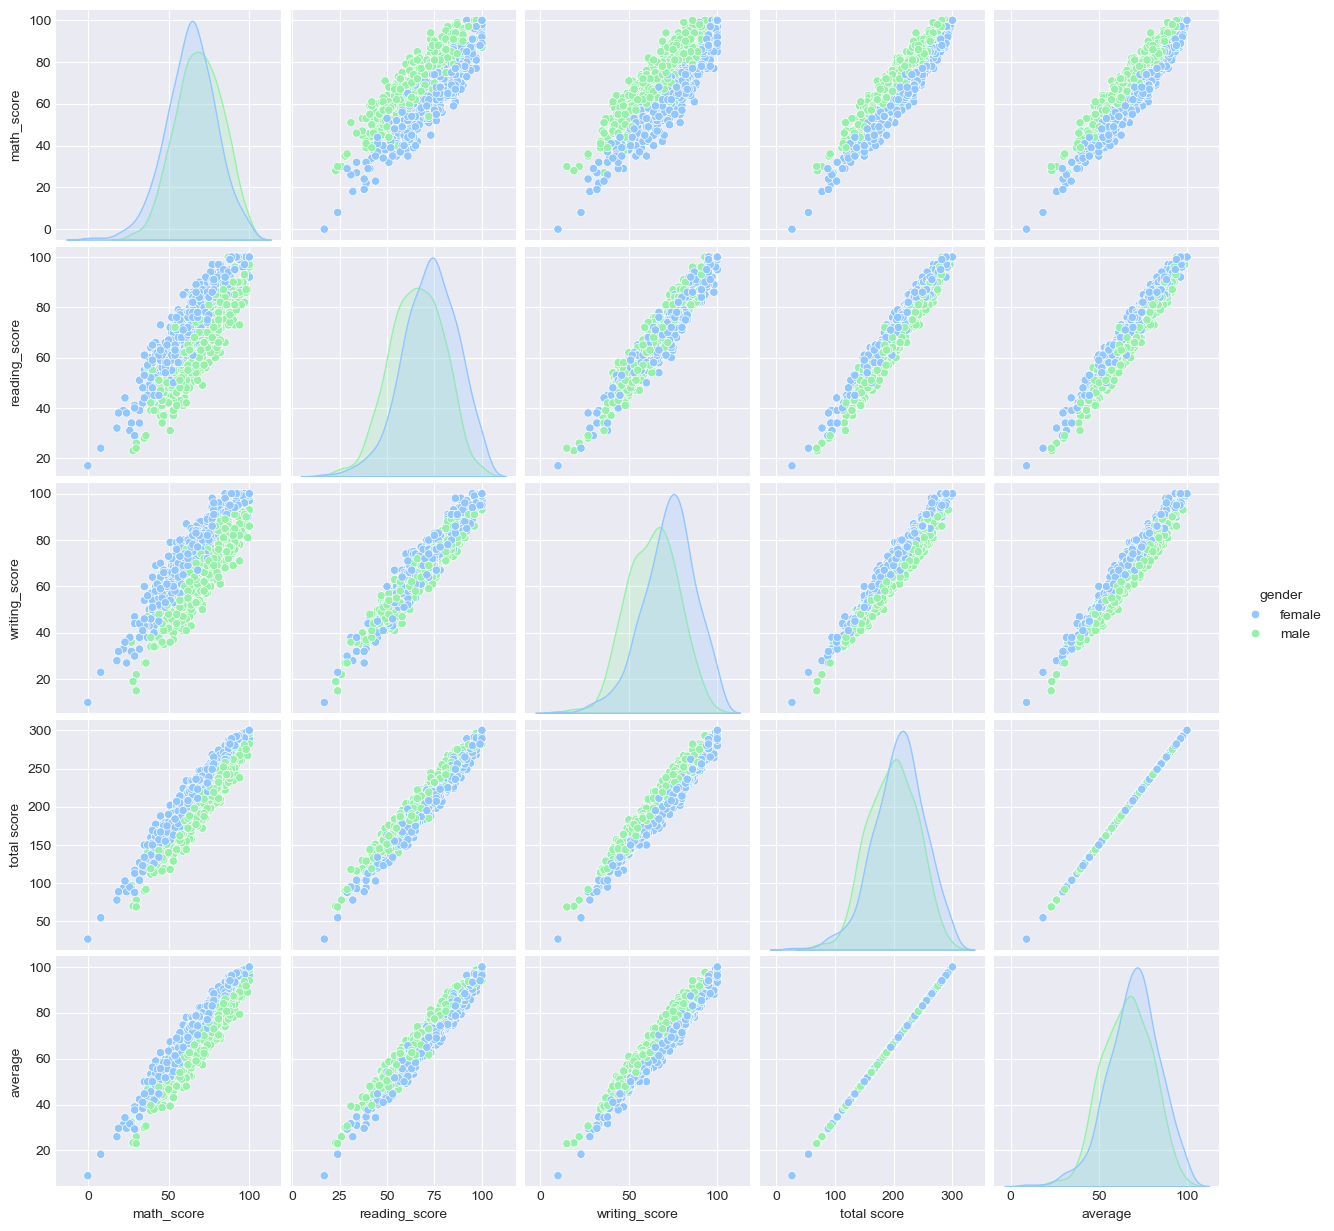

In [290]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
- From the above plot it is clear that all the scores increase linearly with each other.


Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.